In [13]:
import numpy as np
import pandas as pd
import os
from utils.read_EMR import read_EMR
from utils.read_EHG import read_EHG

In [6]:
import matplotlib.pyplot as plt

In [24]:
folder_path="dataset"
all_Labels,all_EMR_data,all_name=read_EMR(folder_path)

In [21]:
all_EHG_data.shape

(159, 301, 106)

In [19]:
np.save("DATA_EHG.npy", all_EHG_data)


In [4]:
from ydata_profiling import ProfileReport
import pandas as pd
profile = ProfileReport(all_EMR_data, title="Pandas Profiling Report")
profile.to_file("report.html")

/opt/anaconda3/envs/TRONG/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 377.63it/s]


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [25]:
df=all_EMR_data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rectime                    159 non-null    float64
 1   Age                        159 non-null    float64
 2   Parity                     159 non-null    float64
 3   Abortions                  159 non-null    float64
 4   Weight                     159 non-null    float64
 5   Bleeding_first_trimester   159 non-null    float64
 6   Bleeding_second_trimester  159 non-null    float64
 7   Smoker                     159 non-null    float64
dtypes: float64(8)
memory usage: 10.1 KB


In [33]:
labels=np.array(all_Labels)[:,0].astype(int)

In [34]:
df['Preterm']=labels

In [35]:
df.to_csv("DATA_EMR.csv", index=False, encoding="utf-8-sig")


In [10]:
labels=np.array(all_Labels)[:,0]

In [11]:
X=df.values
y=labels

In [12]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [52]:
model = LogisticRegression(class_weight='balanced', random_state=0)
model.fit(X_train,y_train)
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.42
y_pred_custom = (y_proba >= threshold).astype(int)
recall = recall_score(y_test, y_pred_custom)
cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f" Với ngưỡng phân loại Threshold: {threshold}")
print(f" Kết quả Recall (Sensitivity): {recall:.3f}")
print(f" Kết quả Specificity: {specificity:.3f}")

 Với ngưỡng phân loại Threshold: 0.42
 Kết quả Recall (Sensitivity): 0.750
 Kết quả Specificity: 0.462


In [29]:
y_test

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

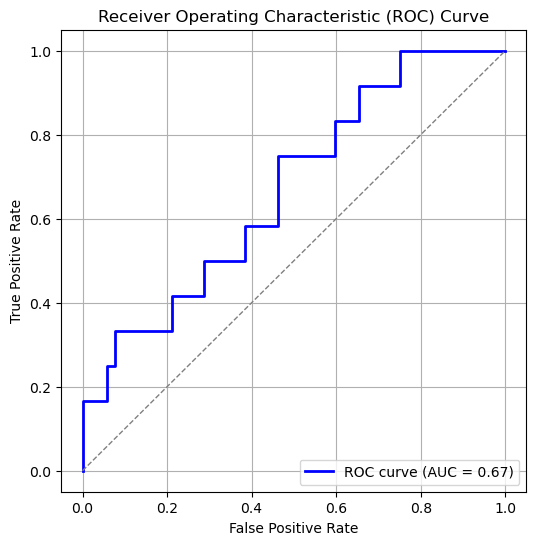

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

# Tính FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính AUC
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # đường ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()